## ```Imports```
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## ```EDA```
---

In [2]:
fraud = pd.read_csv('../Fraud-Project/SmallBalancedClasses.csv')

In [3]:
fraud.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,hour
0,2019-12-13 05:41:26,378278619832195,fraud_Dach-Nader,misc_net,3.17,F,Eugene,OR,97403,44.0385,-123.0614,191096,"Scientist, physiological",1964-04-06,44.716305,-123.984986,0,6
1,2020-03-11 22:31:29,4725837176265195730,fraud_Torphy-Goyette,shopping_pos,16.37,F,Jay,FL,32565,30.8985,-87.1332,5719,Higher education careers adviser,1994-11-05,30.635023,-88.086411,0,23
2,2019-11-12 01:08:37,373905417449658,fraud_Bruen-Yost,misc_pos,8.54,F,Meridian,TX,76665,31.9290,-97.6443,2526,Phytotherapist,1970-11-12,32.399693,-97.414423,0,2
3,2020-04-27 13:59:23,2305336922781618,fraud_Terry Ltd,home,140.66,M,Moulton,IA,52572,40.6866,-92.6833,1132,Probation officer,1961-02-14,40.467099,-92.329573,0,14
4,2020-03-14 05:28:44,3565196229855512,fraud_Stracke-Lemke,grocery_pos,85.19,F,Unionville,MO,63565,40.4815,-92.9951,3805,"Investment banker, corporate",1950-09-15,40.212465,-93.464464,0,6


In [4]:
fraud.groupby('gender')['amt'].mean()

gender
F    270.382765
M    330.589994
Name: amt, dtype: float64

In [5]:
fraud[fraud['is_fraud']==1]['gender'].value_counts(normalize=True)

M    0.502398
F    0.497602
Name: gender, dtype: float64

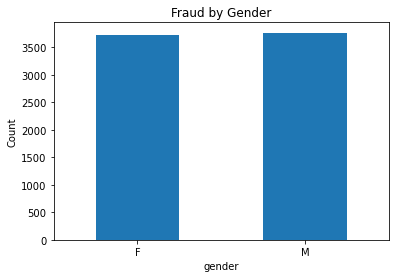

In [6]:
fraud.groupby('gender')['is_fraud'].sum().plot(kind='bar')
plt.title('Fraud by Gender')
plt.xticks(rotation=1)
plt.ylabel('Count');

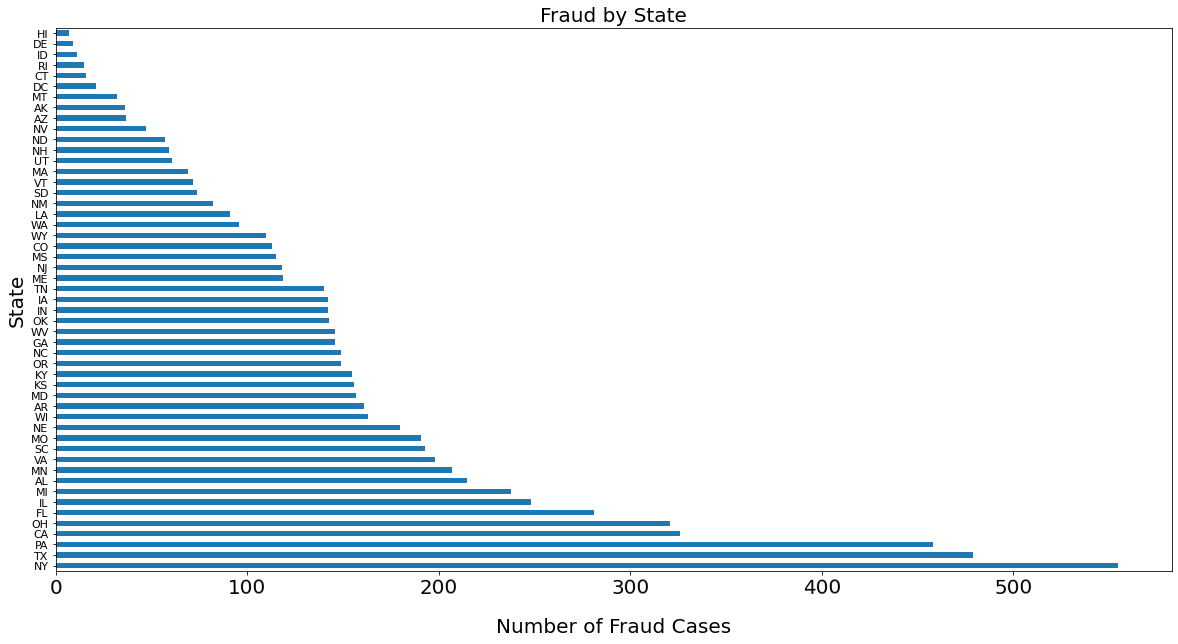

In [38]:
fraud.groupby('state')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by State', fontsize=20)
plt.xticks(rotation=1, fontsize=20)
plt.yticks(fontsize=11)
plt.ylabel('State',fontsize=20)
plt.xlabel('Number of Fraud Cases', fontsize=20, labelpad=20);

**The top 5 states for fraud are New York, Texas, Pennsylvania, California, and Ohio.**

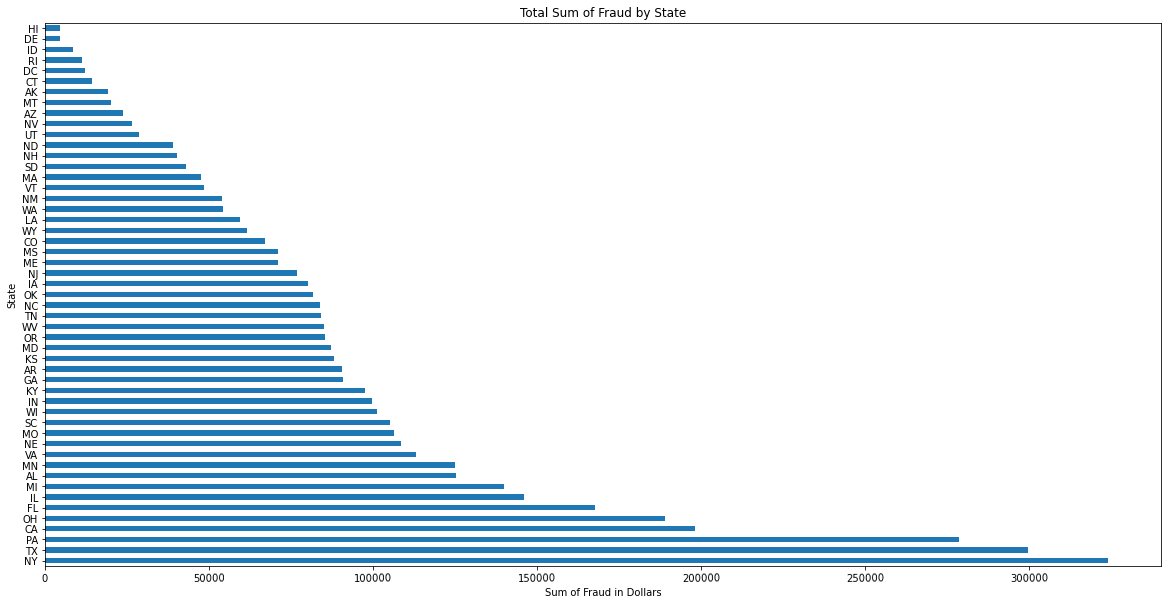

In [8]:
fraud.groupby('state')['amt'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Total Sum of Fraud by State')
plt.xticks(rotation=1)
plt.ylabel('State')
plt.xlabel('Sum of Fraud in Dollars');

**The top 5 states for Sum of fraud are New York, Texas, Pennsylvania, California, and Ohio. These are also the top 5 states with most frequent fraud cases.**

In [9]:
fraud[fraud['zip']==82514]['is_fraud'].value_counts()

0    23
1    21
Name: is_fraud, dtype: int64

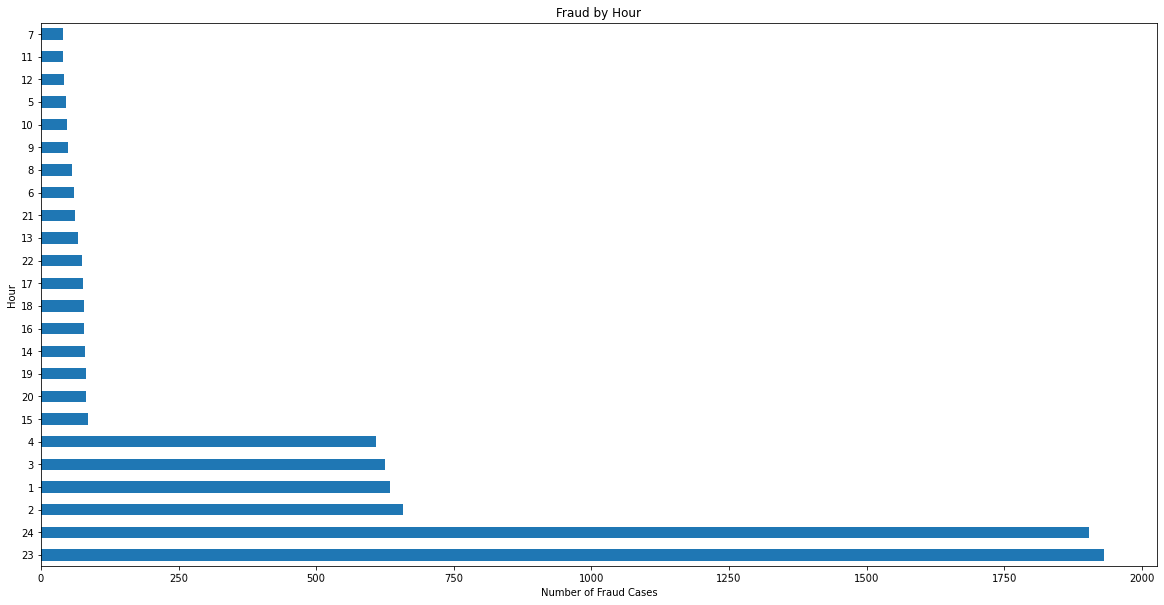

In [16]:
fraud.groupby('hour')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Hour')
plt.xticks(rotation=1)
plt.ylabel('Hour')
plt.xlabel('Number of Fraud Cases');

**Most fraud cases happen between 10pm-4am.**

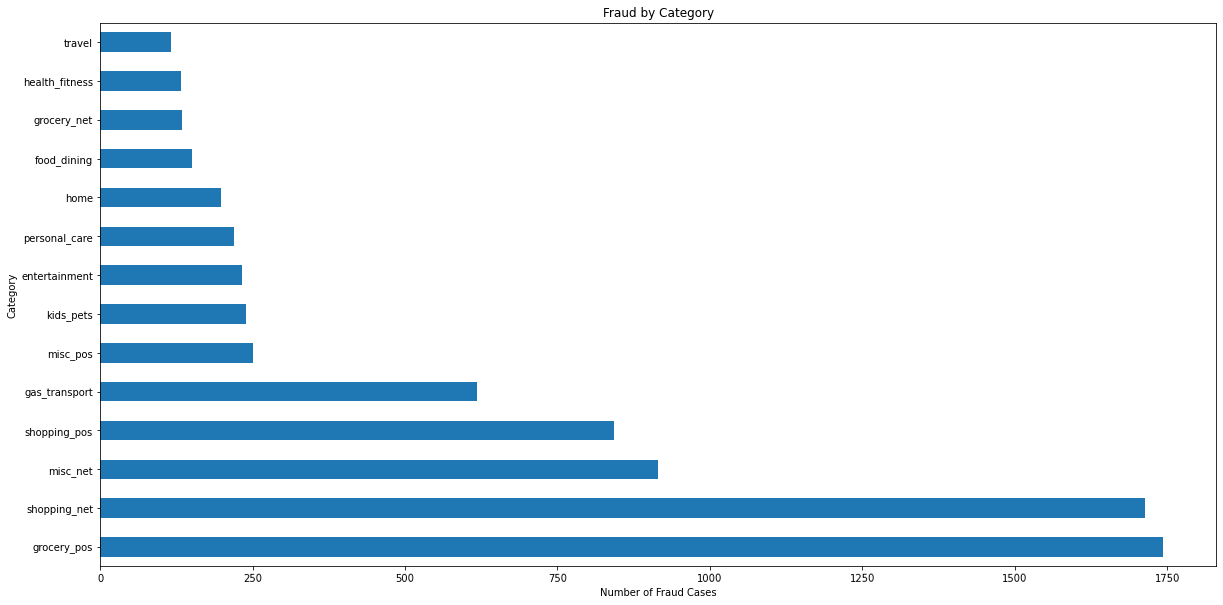

In [11]:
fraud.groupby('category')['is_fraud'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(20,10))
plt.title('Fraud by Category')
plt.xticks(rotation=1)
plt.ylabel('Category')
plt.xlabel('Number of Fraud Cases');

**Most fraud cases are shopping_net (online shopping) and grocery_pos (grocery with card at point of sale).**

In [12]:
fraud[fraud['merchant']=='fraud_Kuhn LLC']['category'].value_counts()

shopping_pos    43
misc_net        26
Name: category, dtype: int64

In [13]:
fraud[fraud['category']=='grocery_pos']['job'].value_counts()

Trading standards officer    22
Mechanical engineer          21
Naval architect              19
Exhibition designer          17
Producer, radio              16
                             ..
Manufacturing engineer        1
Ship broker                   1
Veterinary surgeon            1
Administrator, arts           1
Teacher, primary school       1
Name: job, Length: 458, dtype: int64

In [14]:
fraud.describe()

,cc_num,amt,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour
count,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000,1.501200e+04,15012.000000,15012.000000,15012.000000,15012.000000
mean,4.116061e+17,299.142826,48536.222422,38.597969,-90.153831,9.465576e+04,38.587773,-90.157656,0.500000,14.474754
std,1.296647e+18,369.171521,27141.832326,5.104814,14.071088,3.163972e+05,5.141105,14.084716,0.500017,8.389713
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,19.093881,-166.550779,0.000000,1.000000
25%,1.800312e+14,20.297500,25213.000000,34.882900,-96.809400,7.410000e+02,34.919930,-96.929459,0.000000,6.000000
50%,3.521417e+15,88.625000,47515.000000,39.405500,-86.992000,2.518000e+03,39.411434,-87.187037,0.500000,16.000000
75%,4.634956e+15,486.715000,71832.000000,41.846700,-80.124800,2.047800e+04,41.945082,-80.119993,1.000000,23.000000
max,4.992346e+18,3250.050000,99783.000000,66.693300,-67.950300,2.906700e+06,67.510267,-66.993669,1.000000,24.000000


In [19]:
fraud[fraud['state']=='NY'].shape

(1020, 18)

In [39]:
fraud['state'].value_counts()[:5]

NY    1020
TX    1001
PA     892
CA     696
OH     593
Name: state, dtype: int64

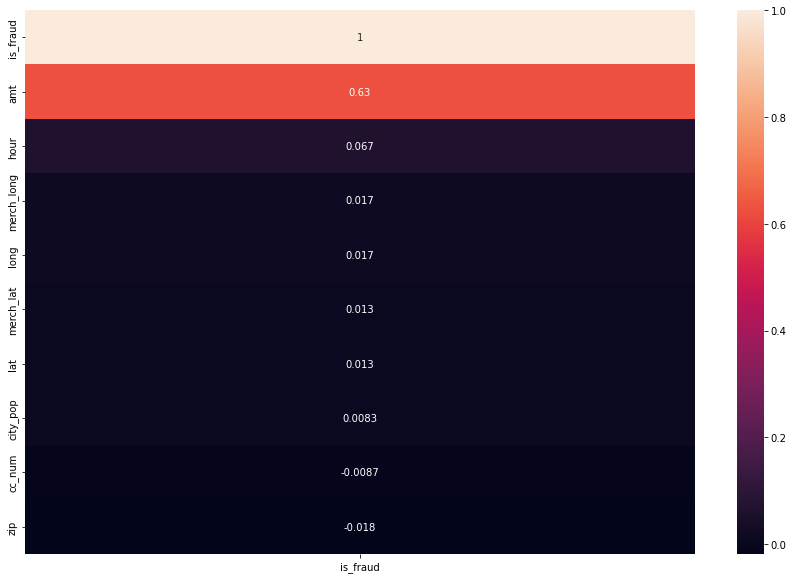

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(fraud.corr()[['is_fraud']].sort_values(by='is_fraud',ascending=False),annot=True);

**We can see that there is moderately strong correlation between the amount of a purchase and whether the purchase is a fraudlent.**